In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Listing all the Datasets in directory

In [2]:
files = [file for file in os.listdir(r'C:\Users\HP\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data')]

In [3]:
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


# Creating an empty Dataframe to merge all available Datasets

In [4]:
df = pd.DataFrame()

In [5]:
for file in files:
    temp_df = pd.read_csv(r'C:\Users\HP\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\\'+file)
    df = pd.concat([df,temp_df])

df.to_csv('all_months_sales_data.csv')

In [6]:
df.shape

(186846, 6)

In [7]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [8]:
df.tail(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
11685,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186846 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186301 non-null  object
 1   Product           186301 non-null  object
 2   Quantity Ordered  186301 non-null  object
 3   Price Each        186301 non-null  object
 4   Order Date        186301 non-null  object
 5   Purchase Address  186301 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [10]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186301,186301,186301,186301,186301,186301
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,351,21903,168552,21903,351,351


In [11]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

# We can see some records are NULL so we can delete them entirely

In [12]:
df[df['Order ID'].isna()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.dropna(inplace = True)
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### What was the best Month for sale and How much was earned that Month ?

#### To solve this question we need the month and we can get the month using 'Order Date' column

In [14]:
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### We can use pd.to_datetime() but using str functions instead.

In [15]:
# This is how we can Silce the coulmn values !

df['Order Date'].str[0:2]

0        04
2        04
3        04
4        04
5        04
         ..
11681    09
11682    09
11683    09
11684    09
11685    09
Name: Order Date, Length: 186301, dtype: object

In [16]:
# added new month column at the end

df['Month'] = df['Order Date'].str[0:2]

In [17]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


#### While looking at the data found some redundancy so we can directly remove this records from the DataFrame

In [18]:
df[df['Order Date'] == 'Order Date']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [19]:
df = df[df['Order Date'].str[0:2] != 'Or']

In [20]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [21]:
df[df['Order ID'] == 'Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  object
dtypes: object(7)
memory usage: 11.3+ MB


#### Now the data looks clean !

In [23]:
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  int64 
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  object
dtypes: int64(1), object(6)
memory usage: 11.3+ MB


In [25]:
df['Price Each'] = df['Price Each'].astype(float)

In [26]:
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [27]:
df['Total_Price'] = df['Quantity Ordered'] * df['Price Each']

In [28]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Price
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.97
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.99


In [29]:
df.groupby('Month')['Total_Price'].sum().sort_values(ascending = False)

Month
12    4613443.34
10    3736726.88
04    3390670.24
11    3199603.20
05    3152606.75
03    2807100.38
07    2647775.76
06    2577802.26
08    2244467.88
02    2202022.42
09    2097560.13
01    1822256.73
Name: Total_Price, dtype: float64

In [30]:
import numpy as np

[]

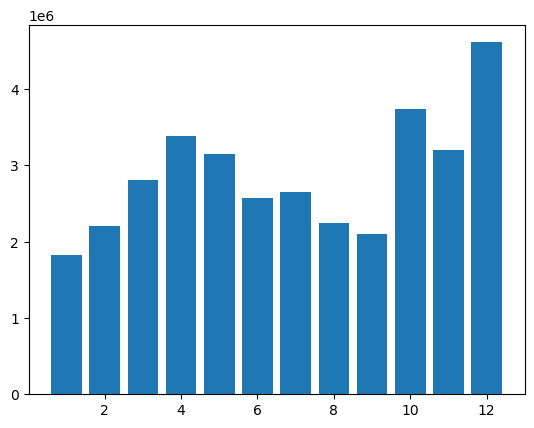

In [31]:
plt.bar(np.arange(1,13),df.groupby('Month')['Total_Price'].sum())
plt.plot()

In [32]:
# Get the City from the Purchase Address

df['Purchase Address'].str.split(',').str[1].str.strip(' ')

# Get the STATE of the City

df['Purchase Address'].str.split(',').str[1:].str[1].str.split(' ').str[1]

0        TX
2        MA
3        CA
4        CA
5        CA
         ..
11681    CA
11682    CA
11683    CA
11684    CA
11685    CA
Name: Purchase Address, Length: 185950, dtype: object

In [33]:
 df['New_City'] = df['Purchase Address'].str.split(',').str[1].str.strip(' ') + ' (' +  df['Purchase Address'].str.split(',').str[1:].str[1].str.split(' ').str[1]    + ')'         

In [34]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Price,New_City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.97,Los Angeles (CA)
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00,San Francisco (CA)
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.00,San Francisco (CA)
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.99,San Francisco (CA)


In [35]:
df['New_City'].unique()

array(['Dallas (TX)', 'Boston (MA)', 'Los Angeles (CA)',
       'San Francisco (CA)', 'Seattle (WA)', 'Atlanta (GA)',
       'New York City (NY)', 'Portland (OR)', 'Austin (TX)',
       'Portland (ME)'], dtype=object)

In [36]:
cities = list(df['New_City'].unique())

In [37]:
df.groupby('New_City')['Total_Price'].sum().sort_values(ascending=False)

New_City
San Francisco (CA)    8262203.91
Los Angeles (CA)      5452570.80
New York City (NY)    4664317.43
Boston (MA)           3661642.01
Atlanta (GA)          2795498.58
Dallas (TX)           2767975.40
Seattle (WA)          2747755.48
Portland (OR)         1870732.34
Austin (TX)           1819581.75
Portland (ME)          449758.27
Name: Total_Price, dtype: float64

#### MOST IMP STEP

[]

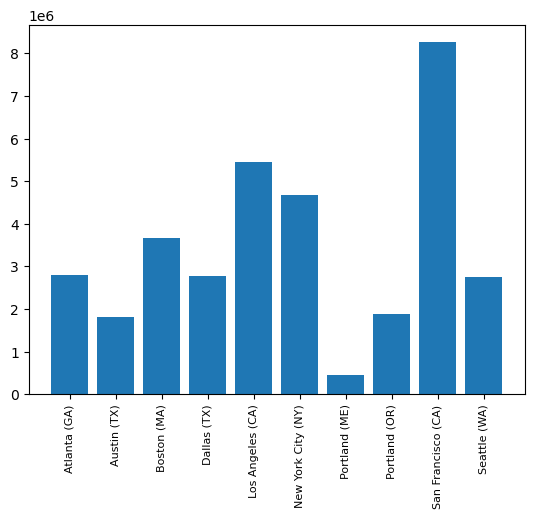

In [38]:
cities = [city for city, tmp_df in df.groupby('New_City')]
plt.bar(cities,df.groupby('New_City')['Total_Price'].sum())
plt.xticks(cities,rotation='vertical',size=8)
plt.plot()

In [39]:
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Price,New_City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA)


In [40]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [41]:
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Price,New_City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA)


In [42]:
df['Hours'] = df['Order Date'].dt.hour

In [43]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Price,New_City,Hours
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),9
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",09,8.97,Los Angeles (CA),20
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00,San Francisco (CA),16
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",09,700.00,San Francisco (CA),7
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",09,379.99,San Francisco (CA),17


In [44]:
df['Minutes'] = df['Order Date'].dt.minute

In [45]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Price,New_City,Hours,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),9,27
...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",09,8.97,Los Angeles (CA),20,56
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00,San Francisco (CA),16,0
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",09,700.00,San Francisco (CA),7,39
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",09,379.99,San Francisco (CA),17,30


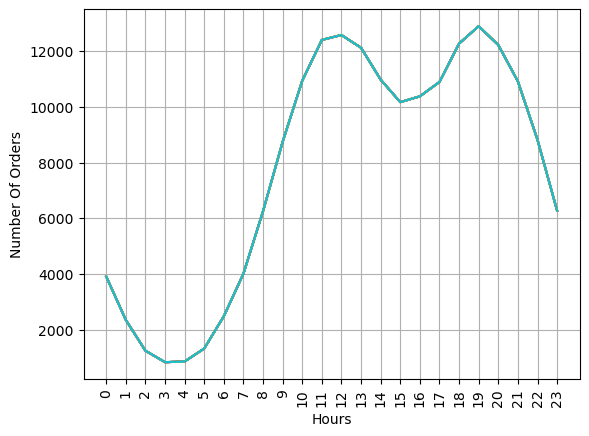

In [46]:
hours = [hour for hour, tmp_df in df.groupby('Hours')]
plt.plot(hours,df.groupby('Hours').count())
plt.xticks(hours,rotation='vertical')
plt.xlabel('Hours')
plt.ylabel('Number Of Orders')
plt.grid()

In [47]:
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Price,New_City,Hours,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14,38


In [48]:
df['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [49]:
df.groupby(df['Order Date'].dt.date).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Price,New_City,Hours,Minutes
Order Date,,,,,,,,,,,
2019-01-01,302,302,302,302,302,302,302,302,302,302,302
2019-01-02,324,324,324,324,324,324,324,324,324,324,324
2019-01-03,296,296,296,296,296,296,296,296,296,296,296
2019-01-04,294,294,294,294,294,294,294,294,294,294,294
2019-01-05,308,308,308,308,308,308,308,308,308,308,308
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-28,819,819,819,819,819,819,819,819,819,819,819
2019-12-29,841,841,841,841,841,841,841,841,841,841,841
2019-12-30,810,810,810,810,810,810,810,810,810,810,810


In [50]:
df.corr()

,Quantity Ordered,Price Each,Total_Price,Hours,Minutes
Quantity Ordered,1.000000,-0.148272,-0.139417,-0.002218,0.001225
Price Each,-0.148272,1.000000,0.999203,0.001721,-0.002163
Total_Price,-0.139417,0.999203,1.000000,0.001668,-0.002162
Hours,-0.002218,0.001721,0.001668,1.000000,-0.015345
Minutes,0.001225,-0.002163,-0.002162,-0.015345,1.000000


In [51]:
df['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [52]:
len(df)

185950

In [53]:
df['Order ID'].nunique()

178437

In [54]:
df['Order ID'].value_counts().head()

160873    5
212334    4
242936    4
312407    4
295681    4
Name: Order ID, dtype: int64

In [55]:
df[df['Order ID'] == '160873']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Price,New_City,Hours,Minutes
10836,160873,iPhone,1,700.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",02,700.00,San Francisco (CA),10,24
10837,160873,Lightning Charging Cable,1,14.95,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",02,14.95,San Francisco (CA),10,24
10838,160873,Apple Airpods Headphones,1,150.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",02,150.00,San Francisco (CA),10,24
10839,160873,Wired Headphones,1,11.99,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",02,11.99,San Francisco (CA),10,24
10840,160873,Google Phone,1,600.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",02,600.00,San Francisco (CA),10,24


In [56]:
df[df['Order ID'] == '212334']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Price,New_City,Hours,Minutes
2537,212334,iPhone,1,700.00,2019-06-06 13:38:00,"834 Adams St, Boston, MA 02215",06,700.00,Boston (MA),13,38
2538,212334,Lightning Charging Cable,1,14.95,2019-06-06 13:38:00,"834 Adams St, Boston, MA 02215",06,14.95,Boston (MA),13,38
2539,212334,Apple Airpods Headphones,1,150.00,2019-06-06 13:38:00,"834 Adams St, Boston, MA 02215",06,150.00,Boston (MA),13,38
2540,212334,Wired Headphones,1,11.99,2019-06-06 13:38:00,"834 Adams St, Boston, MA 02215",06,11.99,Boston (MA),13,38


In [57]:
df[df['Order ID'] == '271688']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Price,New_City,Hours,Minutes
12915,271688,Google Phone,1,600.00,2019-10-05 19:26:00,"299 8th St, Portland, OR 97035",10,600.00,Portland (OR),19,26
12916,271688,USB-C Charging Cable,1,11.95,2019-10-05 19:26:00,"299 8th St, Portland, OR 97035",10,11.95,Portland (OR),19,26
12917,271688,Wired Headphones,1,11.99,2019-10-05 19:26:00,"299 8th St, Portland, OR 97035",10,11.99,Portland (OR),19,26


In [58]:
# Creating a new DataFrame for Multiple Products but Order Id is Same

In [59]:
# This is how we can add Conditions to value_counts()

df['Order ID'].value_counts().loc[lambda x : x>1]

160873    5
212334    4
242936    4
312407    4
295681    4
         ..
218548    2
215700    2
236409    2
213332    2
182374    2
Name: Order ID, Length: 7136, dtype: int64

In [60]:
# This is how we can fetch all the duplicated Records !!!

new_df = df[df['Order ID'].duplicated(keep=False)]

In [61]:
new_df['Order ID'].value_counts()

160873    5
235798    4
178158    4
295681    4
196615    4
         ..
158357    2
158348    2
158342    2
158337    2
259350    2
Name: Order ID, Length: 7136, dtype: int64

In [62]:
new_df.groupby(['Order ID','Product']).sum()

Quantity Ordered  Price Each  Total_Price  \
Order ID Product                                                               
141275   USB-C Charging Cable                     1       11.95        11.95   
         Wired Headphones                         1       11.99        11.99   
141290   AA Batteries (4-pack)                    3        3.84        11.52   
         Apple Airpods Headphones                 1      150.00       150.00   
141365   Vareebadd Phone                          1      400.00       400.00   
...                                             ...         ...          ...   
319584   iPhone                                   1      700.00       700.00   
319596   Lightning Charging Cable                 1       14.95        14.95   
         iPhone                                   1      700.00       700.00   
319631   34in Ultrawide Monitor                   1      379.99       379.99   
         Lightning Charging Cable                 1       14.95        14.95   

                                   Hours  Minutes  
Order ID Product                                   
141275   USB-C Charging Cable         16        6  
         Wired Headphones             16        6  
141290   AA Batteries (4-pack)         8       25  
         Apple Airpods Headphones      8       25  
141365   Vareebadd Phone              11       19  
...                                  ...      ...  
319584   iPhone                        0       30  
319596   Lightning Charging Cable      8       44  
         iPhone                        8       44  
319631   34in Ultrawide Monitor       22       35  
         Lightning Charging Cable     22       35  

[14338 rows x 5 columns]

In [63]:
new_df['Grouped'] = new_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [64]:
new_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_Price,New_City,Hours,Minutes,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",09,3.84,Atlanta (GA),20,18,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,11.99,Atlanta (GA),0,25,"Wired Headphones,AAA Batteries (4-pack)"
11640,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,5.98,Atlanta (GA),0,25,"Wired Headphones,AAA Batteries (4-pack)"
11677,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",09,600.00,San Francisco (CA),13,49,"Google Phone,USB-C Charging Cable"


In [65]:
final = new_df[['Order ID','Grouped']].drop_duplicates()
final.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [66]:
from itertools import combinations
from collections import Counter

In [67]:
count = Counter()

for row in new_df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

In [68]:
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 2140
('Google Phone', 'USB-C Charging Cable') 2116
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 949
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 452
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253


In [69]:
df.groupby('Product')['Quantity Ordered'].sum()

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [70]:
products = [product for product, tmp_df in df.groupby('Product')]

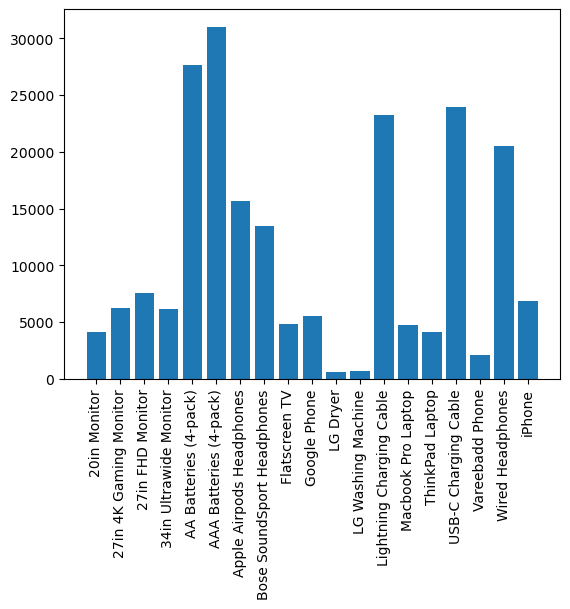

In [71]:
plt.bar(products,df.groupby('Product')['Quantity Ordered'].sum())
plt.xticks(rotation='vertical')
plt.show()

# END